# Code and inspiration from
- https://www.tensorflow.org/tutorials/images/cnn

- Test on not rotated data: 70.86% accuracy
- Test on rotated data: 40.70% accuracy

In [1]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

## Original Images

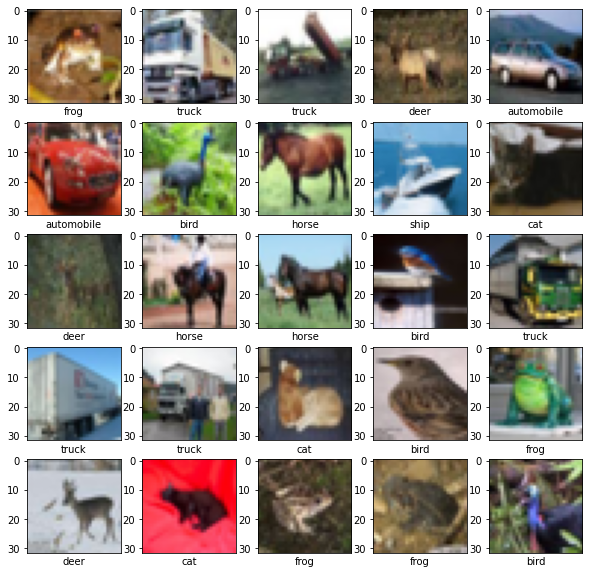

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## CNN Model

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

## Model Summary

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

## Model Training/Loading

In [7]:


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_path = 'models/CNN_CIFAR10_O'
if os.path.exists(model_path):
    model = tf.keras.models.load_model(model_path)
    history = None
else:
    history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
    
# Save model
#model.save(model_path)

In [8]:
if history:
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    plt.plot(history.history['accuracy'], label=f'accuracy = {train_acc:.2f}')
    plt.plot(history.history['val_accuracy'], label = f'val_accuracy = {val_acc:.2f}')
    plt.title('O/O CIFAR10 Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')

### Simple CNN / CIFAR10 /Accurraccy O/O
- trained on Original
- tested on Original
- Accuraccy 30%

In [8]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.8734 - accuracy: 0.7086


##### Generator/yield - https://realpython.com/introduction-to-python-generators/

In [9]:
def generator(data, labels, projector):
    for i in range(len(data)):
        yield np.expand_dims(projector(data[i]),0), labels[i]

In [10]:
rotation_gen = generator(test_images, test_labels, lambda x: tfa.image.rotate(
                                                                       x, 
                                                                       np.random.randint(-90, 90) * np.pi / 180, 
                                                                       fill_mode='nearest'))

In [11]:
img, label = next(rotation_gen)
print(img.shape)
print(train_labels[5].shape)

(1, 32, 32, 3)
(1,)


### Simple CNN / CIFAR10 / Accurraccy O/A
- trained on Original
- tested on Augmented ~ random rotations
- Accuraccy: ~30%

In [12]:
model.evaluate(rotation_gen,verbose=1)

9999/9999 [==============================] - 30s 3ms/step - loss: 2.2687 - accuracy: 0.4070


[2.2687129974365234, 0.40704071521759033]

## Rotated Images / Visual

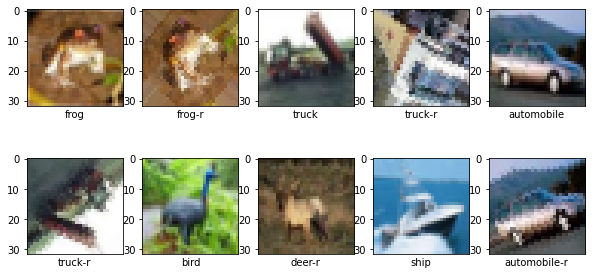

In [13]:
rotate = generator(train_images, train_labels, lambda x: tfa.image.rotate(
                                                                       x, 
                                                                       np.random.randint(-90,360), 
                                                                       fill_mode='nearest'))
plt.figure(figsize=(10,5))
plt.title('Orignal orientation vs. random rotation')
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.grid(False)
    if i % 2 == 0:
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    else:
        img, label = next(rotate)
        plt.imshow(np.squeeze(img,0), cmap=plt.cm.binary)
        plt.xlabel(class_names[label[0]]+'-r')
        
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    
plt.show()
rotate.close()